In [2]:
from statsmodels.api import OLS, add_constant
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sea
import yfinance as yf

In [3]:
tickers = ['GDX', 'GOAU']
prices = yf.download(tickers).dropna()

[*********************100%***********************]  2 of 2 completed


Text(0.5, 1.0, 'GDX VS GOAU')

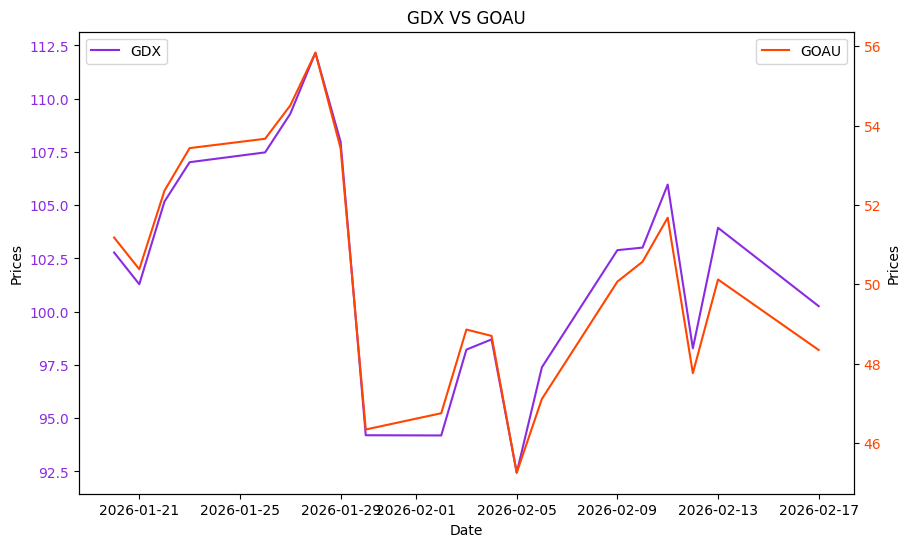

In [4]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(prices['Close']['GDX'], color='blueviolet', label="GDX")
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices')
ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(prices['Close']['GOAU'], color='orangered', label="GOAU")
ax2.set_xlabel('Date')
ax2.set_ylabel('Prices')
ax2.tick_params(axis='y', labelcolor='orangered')
ax2.legend(loc='upper right')

plt.title('GDX VS GOAU')

In [5]:
x = add_constant(prices['Close']['GOAU'])
y = prices['Close']['GDX']
model = OLS(endog = y, exog = x)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDX   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     454.5
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           3.19e-14
Time:                        21:52:17   Log-Likelihood:                -28.953
No. Observations:                  20   AIC:                             61.91
Df Residuals:                      18   BIC:                             63.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6350      4.252      2.736      0.014       2.702      20.568
GOAU           1.7985      0.084     21.319      0.000       1.621       1.976
==============================================================================
Omnibus:                        2.021   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.584
Skew:                           0.536   Prob(JB):                        0.453
Kurtosis:                       2.132   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""